In [1]:
# example from https://www.learnpytorch.io/03_pytorch_computer_vision/
# Import PyTorch
import torch
from torch import nn

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower 
# than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\
      \ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.0.0+cu118      
torchvision version: 0.15.1+cu118


In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), #images are PIL format, we want Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup validation data
validation_data = datasets.FashionMNIST(
    root="data",
    train=False, # get validation data
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 16490913.66it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 337651.57it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5447977.71it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 13411352.17it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
train_data

In [3]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
train_data[0][0].shape


torch.Size([1, 28, 28])

In [5]:
train_data[0][0].squeeze().shape # remove the colour channel. 


torch.Size([28, 28])

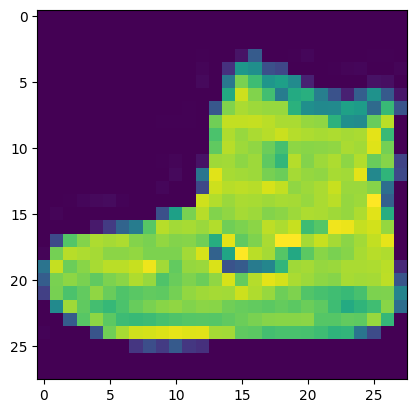

In [6]:
plt.imshow(train_data[0][0].squeeze())

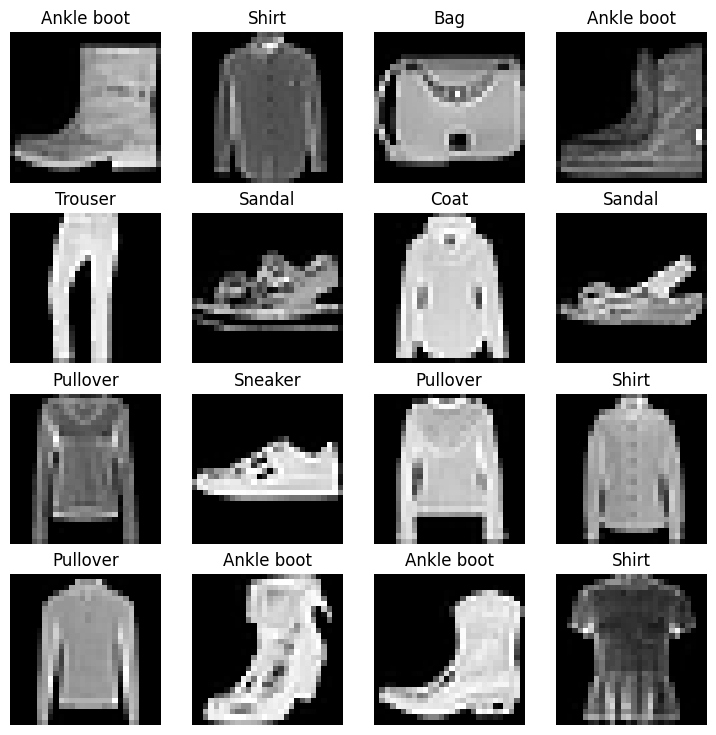

In [7]:
torch.manual_seed(42)
class_names = train_data.classes
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

In [74]:
test_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0118, 0.0000, 0.0000,
           0.0000, 0.0941, 0.7176, 0.7216, 0.3294, 0.2157, 0.1922, 0.4078,
           0.8157, 0.4824, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1961,
           0.7059, 1.0000, 0.9098, 0.8902, 0.9961, 1.0000, 1.0000, 0.9686,
           0.8667, 0.8824, 0.9725, 0.6078, 0.1255, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.3490, 0.7608, 0.9176,
           0.9098, 0.8627, 0.8706, 0.8745, 0.8588, 0.8588, 0.8431, 0.8353,
           0.8353, 0.8235, 0.8353, 0.8902, 0.8431, 0.6902, 0.1804, 0.0000,
           0.0078, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0039, 0.0000, 0.3922, 0.9451, 0.8667, 0.8392,
           0.8627, 0.8784, 0.8824, 0.8784, 0.8706, 0.8824, 0.8627, 0.8706,
           0.8471, 0.8471, 0.8275, 0.8196, 

In [85]:
X, y = test_data[0]
print(y)

2


In [8]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_batches_dl = DataLoader(train_data, # dataset to turn into iterable
                   batch_size=BATCH_SIZE,  
                            shuffle=True # shuffle data every epoch? different data in the batch every epoch. 
                                        )

# batching the validation/test data to make it easier to handle 
test_data, val_data = torch.utils.data.random_split(validation_data, [0.5, 0.5])

validation_batches_dl = DataLoader(val_data,
                            batch_size=BATCH_SIZE,
                            shuffle=False)

test_batches_dl = DataLoader(test_data,
                            batch_size=BATCH_SIZE,
                            shuffle=False)


# Let's check out what we've created
print(f"Dataloaders: {train_batches_dl, validation_batches_dl}") 
print(f"Length of train dataloader: {len(train_batches_dl)}\
 batches of {BATCH_SIZE}")
print(f"Length of validation dataloader: {len(validation_batches_dl)}\
 batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_batches_dl)}\
 batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f60f575edc0>, <torch.utils.data.dataloader.DataLoader object at 0x7f60f31549d0>)
Length of train dataloader: 1875 batches of 32
Length of validation dataloader: 157 batches of 32
Length of validation dataloader: 157 batches of 32


In [87]:
X, y = test_data[0]
print(y)

2


In [9]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_batches_dl))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 2, label size: torch.Size([])


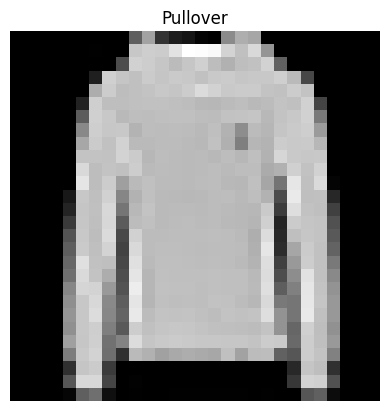

In [10]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off")
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [11]:
# before moving to CNNs going to train a flattened model like they did before the CNN was demonstrated to be a better solution!
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")



Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [12]:
# before moving to CNNs going to train a flattened model like they did before the CNN was demonstrated to be a better solution!
# Create a flatten layer

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = torch.flatten(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([784]) -> [color_channels, height*width]


In [13]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [14]:
# Import library
import torch
# Describe the variable by using torch.tensor() function
f = torch.tensor([[[2, 4],
                   [6, 8]],
                   [[10, 12],
                   [14, 16]]])
# Using the torch.flatten() method
torch.flatten(f)
f.shape
print(f)


tensor([[[ 2,  4],
         [ 6,  8]],

        [[10, 12],
         [14, 16]]])


In [15]:
# define the model
from torch import nn
import torch.nn.functional as F
class Fashion_MNIST_flat_model(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.flatten = nn.Flatten() #define as a layer so produces a tensor output
        self.L0 = nn.Linear(input_shape, hidden_units)
        self.L1 = nn.Linear(hidden_units, hidden_units)
        self.L2 = nn.Linear(hidden_units, output_shape)
        nn.init.constant_(self.L0.bias, 0.0)
        nn.init.kaiming_normal_(self.L0.weight, \
                              mode='fan_in', \
                              nonlinearity='relu')
        nn.init.constant_(self.L1.bias, 0.0)
        nn.init.kaiming_normal_(self.L1.weight, \
                                mode='fan_in', \
                                nonlinearity='relu')
        with torch.no_grad():
          self.L2.weight.data = self.L2.weight.data * 0.01
          nn.init.constant_(self.L2.bias, 0.0)

    def forward(self, X):
      X = self.flatten(X) 
      X = self.L0(X)
      #X = F.relu(self.L0(X))
      #X = F.relu(self.L1(X))
      X = self.L2(X)
      return X


In [16]:
# Instantiate a model
model_0 = Fashion_MNIST_flat_model(input_shape=784, # one for every pixel (28x28)
    hidden_units=10, # how many units in the hiden layer
    output_shape=len(class_names)) # one for every class
model_0.to("cpu") # keep model on CPU to begin with

Fashion_MNIST_flat_model(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (L0): Linear(in_features=784, out_features=10, bias=True)
  (L1): Linear(in_features=10, out_features=10, bias=True)
  (L2): Linear(in_features=10, out_features=10, bias=True)
)

In [17]:
train_batches_dl

In [18]:
len(train_batches_dl)

1875

In [19]:
def calculate_accuracy(Y_train, Y_pred_class): 
  true_positives=(Y_pred_class==Y_train).sum()
  number_of_predictions = len(Y_pred_class)
  return 100 * true_positives/number_of_predictions

In [20]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

LEARNING_RATE = 0.1

# Setup loss function and optimizer
calculate_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=LEARNING_RATE)

# Set the seed and start the timer
torch.manual_seed(42)
#train_time_start_on_cpu = timer()

EPOCHS = 4

# Create training and testing loop
for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_batches_dl):
        model_0.train() # ensuring in training mode, which it should be by default
        # 1. Forward pass
        y_pred = model_0(X)
        #print(y_pred)

        # 2. Calculate loss (per batch)
        loss = calculate_loss(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

       # # Print out how many samples have been seen
        #if batch % 400 == 0:
         #   print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_batches_dl)
    
    ### Validation
    # Setup variables for accumulatively adding up loss and accuracy 
    val_loss, val_acc = 0, 0 
    model_0.eval()
    with torch.inference_mode():
    # doing in batches allows less memory usage but may not be the fastest
        for X, y in validation_batches_dl: 
            # 1. Forward pass
            val_pred = model_0(X)
           
            # 2. Calculate loss (accumatively)
            val_loss += calculate_loss(val_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            val_acc += calculate_accuracy(y, val_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        val_loss /= len(validation_batches_dl)

        # Divide total accuracy by length of test dataloader (per batch)
        val_acc /= len(validation_batches_dl)

    ## Print out what's happening
    print(f"\n Average train loss per batch last epoch: {train_loss:.5f} |\
     Validation loss: {val_loss:.5f}, Validation acc: {val_acc:.2f}%\n")

## Calculate training time      
#train_time_end_on_cpu = timer()
#total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
#                                           end=train_time_end_on_cpu,
#                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 0
-------

 Average train loss per batch last epoch: 0.62339 |     Validation loss: 0.50138, Validation acc: 81.73%

Epoch: 1
-------

 Average train loss per batch last epoch: 0.48261 |     Validation loss: 0.48367, Validation acc: 82.38%

Epoch: 2
-------

 Average train loss per batch last epoch: 0.45979 |     Validation loss: 0.48019, Validation acc: 82.74%

Epoch: 3
-------

 Average train loss per batch last epoch: 0.44659 |     Validation loss: 0.45590, Validation acc: 83.42%



In [21]:
train_data[0][0].shape

torch.Size([1, 28, 28])

In [22]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [23]:
# not going to try and optimise the fully connected model above for learning rate etc., at least not now. Let's crack on with a conv net. 
# Create a convolutional neural network 
# takes input of size 28 by 28 
class Fashion_MNIST_cnn_model(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    via
    https://www.learnpytorch.io/03_pytorch_computer_vision/
    Implementation adapted slightly.
    """
    def __init__(self, input_channels: int, kernels: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_channels, 
                      out_channels=kernels,   # number of kernels used
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # pad 1 either side of output which returns to original size
            nn.ReLU(),
            nn.Conv2d(in_channels=kernels, 
                      out_channels=kernels,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
                         # pooling reduces size from 28 by 28 to 14 by 14
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(kernels, kernels, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(kernels, kernels, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        # max pool reduces 14 by 14  to 7 by 7
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # flatten the height number of layers and the compressed 2D image
            # which is now 7 by 7 into input for linear layer
            nn.Linear(in_features=kernels*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x



In [24]:
torch.manual_seed(42)

# trying out an input.
conv_layer = nn.Conv2d(in_channels=1,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) 

# Pass the data through the convolutional layer
conv_layer(train_data[0][0]) # Note: If running PyTorch <1.11.0, this will error because of shape issues (nn.Conv.2d() expects a 4d tensor as input) 

tensor([[[ 0.0705,  0.0705,  0.0705,  ...,  0.0705,  0.0705,  0.0705],
         [ 0.0705,  0.0705,  0.0705,  ...,  0.0716,  0.0724,  0.0706],
         [ 0.0705,  0.0705,  0.0705,  ...,  0.0719,  0.0679,  0.0748],
         ...,
         [ 0.0502,  0.0929,  0.3020,  ...,  0.5952,  0.5469,  0.5404],
         [ 0.0725,  0.0705,  0.0503,  ...,  0.3280,  0.2323,  0.1284],
         [ 0.0705,  0.0705,  0.0705,  ...,  0.0705,  0.0705,  0.0705]],

        [[-0.0850, -0.0850, -0.0850,  ..., -0.0850, -0.0850, -0.0850],
         [-0.0850, -0.0850, -0.0850,  ..., -0.0848, -0.0838, -0.0842],
         [-0.0850, -0.0850, -0.0850,  ..., -0.0809, -0.0849, -0.0833],
         ...,
         [-0.0650,  0.0453,  0.1523,  ...,  0.2163,  0.1238, -0.0430],
         [-0.0869, -0.0850, -0.0688,  ..., -0.1194, -0.1140, -0.1406],
         [-0.0850, -0.0850, -0.0850,  ..., -0.0850, -0.0850, -0.0850]],

        [[ 0.1987,  0.1987,  0.1987,  ...,  0.1987,  0.1987,  0.1987],
         [ 0.1987,  0.1987,  0.1987,  ...,  0

In [25]:
# Get shapes of weight and bias tensors within conv_layer
print(f"conv_layer weight shape: \n{conv_layer.weight.shape}")
print(f"\nconv_layer bias shape: \n{conv_layer.bias.shape}")

conv_layer weight shape: 
torch.Size([10, 1, 3, 3])

conv_layer bias shape: 
torch.Size([10])


In [26]:
# Instantiate a model
torch.manual_seed(42)
model_cnn = Fashion_MNIST_cnn_model(input_channels=1, 
    kernels=10, 
    output_shape=len(class_names)).to(device)
model_cnn


Fashion_MNIST_cnn_model(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [27]:
# cut and paste training loop from before
# Import tqdm for progress bar
from tqdm.auto import tqdm

LEARNING_RATE = 0.1

# Setup loss function and optimizer
calculate_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_cnn.parameters(), lr=LEARNING_RATE)

# Set the seed and start the timer
torch.manual_seed(42)
#train_time_start_on_cpu = timer()

EPOCHS = 4

# Create training and testing loop
for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_batches_dl):
        model_cnn.train() # ensuring in training mode, which it should be by default
        # 1. Forward pass
        y_pred = model_cnn(X)
        #print(y_pred)

        # 2. Calculate loss (per batch)
        loss = calculate_loss(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

       # # Print out how many samples have been seen
        #if batch % 400 == 0:
         #   print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_batches_dl)
    
    ### Validation
    # Setup variables for accumulatively adding up loss and accuracy 
    val_loss, val_acc = 0, 0 
    model_cnn.eval()
    with torch.inference_mode():
    # doing in batches allows less memory usage but may not be the fastest
        for X, y in validation_batches_dl: 
            # 1. Forward pass
            val_pred = model_cnn(X)
           
            # 2. Calculate loss (accumatively)
            val_loss += calculate_loss(val_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            val_acc += calculate_accuracy(y, val_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        val_loss /= len(validation_batches_dl)

        # Divide total accuracy by length of test dataloader (per batch)
        val_acc /= len(validation_batches_dl)

    ## Print out what's happening
    print(f"\n Average train loss per batch last epoch: {train_loss:.5f} |\
     Validation loss: {val_loss:.5f}, Validation acc: {val_acc:.2f}%\n")


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 0
-------

 Average train loss per batch last epoch: 0.59518 |     Validation loss: 0.40086, Validation acc: 85.71%

Epoch: 1
-------

 Average train loss per batch last epoch: 0.36536 |     Validation loss: 0.35564, Validation acc: 86.52%

Epoch: 2
-------

 Average train loss per batch last epoch: 0.32588 |     Validation loss: 0.33178, Validation acc: 87.74%

Epoch: 3
-------

 Average train loss per batch last epoch: 0.30489 |     Validation loss: 0.33054, Validation acc: 88.00%



In [28]:
# not going to try and optimise the fully connected model above for learning rate etc., at least not now. Let's crack on with a conv net. 
# Create a convolutional neural network 
# takes input of size 28 by 28 
# same model but with different weight initialisations
class Fashion_MNIST_cnn_model_1(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    via
    https://www.learnpytorch.io/03_pytorch_computer_vision/
    Implementation adapted slightly.
    """
    def __init__(self, input_channels: int, kernels: int, output_shape: int):
        super().__init__()
        self.L0 = nn.Conv2d(in_channels=input_channels, 
                      out_channels=kernels,   # number of kernels used
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1) # pad 1 either side of output which returns to original size
        self.L1 = nn.Conv2d(in_channels=kernels, 
                      out_channels=kernels,
                      kernel_size=3,
                      stride=1,
                      padding=1)
        nn.init.constant_(self.L0.bias, 0.0)
        nn.init.kaiming_normal_(self.L0.weight, \
                              mode='fan_in', \
                             nonlinearity='relu')
        nn.init.constant_(self.L1.bias, 0.0)
        nn.init.kaiming_normal_(self.L1.weight, \
                                mode='fan_in', \
                                nonlinearity='relu')
        
        self.L2 = nn.Conv2d(in_channels=kernels, 
                      out_channels=kernels,
                      kernel_size=3,
                      stride=1,
                      padding=1)
        nn.init.constant_(self.L2.bias, 0.0)
        nn.init.kaiming_normal_(self.L2.weight, \
                                mode='fan_in', \
                                nonlinearity='relu')
              
        self.L3 = nn.Conv2d(in_channels=kernels, 
                      out_channels=kernels,
                      kernel_size=3,
                      stride=1,
                      padding=1)
        nn.init.constant_(self.L3.bias, 0.0)
        nn.init.kaiming_normal_(self.L3.weight, \
                                mode='fan_in', \
                                nonlinearity='relu')
        

        self.L4 = nn.Linear(in_features=kernels*7*7, 
                      out_features=output_shape)
        with torch.no_grad():
          self.L4.weight.data = self.L4.weight.data * 0.01
          nn.init.constant_(self.L4.bias, 0.0)

        self.pool_1 = nn.MaxPool2d(kernel_size=2,
                         stride=2)
        self.pool_2 = nn.MaxPool2d(kernel_size=2,
                         stride=2)
        
        self.relu1 = nn.ReLU()
        self.relu2 = nn.ReLU()
        self.relu3 = nn.ReLU()
        self.flatten = nn.Flatten()


    def forward(self, x: torch.Tensor):
      x = self.L0(x)
      x = self.relu1(x)
      x = self.pool_1(x)
      x = self.L2(x)
      x = self.relu2(x)
      x = self.L3(x)
      x = self.relu3(x)
      x = self.pool_1(x)
      x = self.flatten(x)
      x = self.L4(x)
      return x
      



In [29]:
# Instantiate a model
torch.manual_seed(42)
model_cnn_1 = Fashion_MNIST_cnn_model_1(input_channels=1, 
    kernels=10, 
    output_shape=len(class_names)).to(device)
model_cnn_1

Fashion_MNIST_cnn_model_1(
  (L0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (L1): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (L2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (L3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (L4): Linear(in_features=490, out_features=10, bias=True)
  (pool_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (pool_2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu1): ReLU()
  (relu2): ReLU()
  (relu3): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
)

In [30]:
# cut and paste training loop from before
# Import tqdm for progress bar
from tqdm.auto import tqdm

LEARNING_RATE = 0.1
MODEL_NAME = model_cnn_1

# Setup loss function and optimizer
calculate_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=MODEL_NAME.parameters(), lr=LEARNING_RATE)

# Set the seed and start the timer
torch.manual_seed(42)
#train_time_start_on_cpu = timer()

EPOCHS = 4

# Create training and testing loop
for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_batches_dl):
        MODEL_NAME.train() # ensuring in training mode, which it should be by default
        # 1. Forward pass
        y_pred = MODEL_NAME(X)
        #print(y_pred)

        # 2. Calculate loss (per batch)
        loss = calculate_loss(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

       # # Print out how many samples have been seen
        #if batch % 400 == 0:
         #   print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_batches_dl)
    
    ### Validation
    # Setup variables for accumulatively adding up loss and accuracy 
    val_loss, val_acc = 0, 0 
    MODEL_NAME.eval()
    with torch.inference_mode():
    # doing in batches allows less memory usage but may not be the fastest
        for X, y in validation_batches_dl: 
            # 1. Forward pass
            val_pred = MODEL_NAME(X)
           
            # 2. Calculate loss (accumatively)
            val_loss += calculate_loss(val_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            val_acc += calculate_accuracy(y, val_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        val_loss /= len(validation_batches_dl)

        # Divide total accuracy by length of test dataloader (per batch)
        val_acc /= len(validation_batches_dl)

    ## Print out what's happening
    print(f"\n Average train loss per batch last epoch: {train_loss:.5f} |\
     Validation loss: {val_loss:.5f}, Validation acc: {val_acc:.2f}%\n")

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 0
-------

 Average train loss per batch last epoch: 0.48127 |     Validation loss: 0.38380, Validation acc: 85.81%

Epoch: 1
-------

 Average train loss per batch last epoch: 0.34161 |     Validation loss: 0.33982, Validation acc: 87.00%

Epoch: 2
-------

 Average train loss per batch last epoch: 0.31140 |     Validation loss: 0.32312, Validation acc: 87.94%

Epoch: 3
-------

 Average train loss per batch last epoch: 0.29388 |     Validation loss: 0.31657, Validation acc: 88.48%



From the above we see that good initialisation gets us two epochs worth of training ahead of the game! (although would need to show this from more randome seeds to be convincing that this was generalisable!)

In [31]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

    

In [32]:
# sample from our test data
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[1]} ({class_names[test_labels[1]]})")

# Make predictions on test samples with model_cnn_1
pred_probs= make_predictions(model=model_cnn_1, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 6 (Shirt)
Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 6 (Shirt)


tensor([[3.4172e-03, 7.9099e-04, 1.5188e-01, 1.3130e-01, 5.0661e-01, 2.5196e-04,
         1.7829e-01, 1.9535e-04, 2.6997e-02, 2.6363e-04],
        [7.8914e-04, 6.4704e-05, 2.0670e-02, 7.9454e-04, 7.0983e-02, 5.4028e-05,
         9.0632e-01, 1.7654e-05, 2.4591e-04, 6.1136e-05]])

So we got the first example wrong and the second correct!


In [33]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([4, 6, 2, 9, 5, 9, 6, 4, 1])

In [34]:
# Are our predictions in the same form as our test labels? 
test_labels, pred_classes

([6, 6, 6, 9, 5, 9, 6, 4, 1], tensor([4, 6, 2, 9, 5, 9, 6, 4, 1]))

In [38]:
# calculate test set accuracy and compare to validation 
    ### test set confirmation of best model
MODEL_NAME = model_cnn_1
# Setup variables for accumulatively adding up loss and accuracy 
test_loss, test_acc = 0, 0 
MODEL_NAME.eval()
with torch.inference_mode():
# doing in batches allows less memory usage but may not be the fastest
    for X, y in validation_batches_dl: 
        # 1. Forward pass
        test_pred = MODEL_NAME(X)
        
        # 2. Calculate loss (accumatively)
        test_loss += calculate_loss(test_pred, y) # accumulatively add up the loss per epoch

        # 3. Calculate accuracy (preds need to be same as y_true)
        test_acc += calculate_accuracy(y, test_pred.argmax(dim=1))
    
    # Calculations on test metrics need to happen inside torch.inference_mode()
    # Divide total test loss by length of test dataloader (per batch)
    test_loss /= len(validation_batches_dl)

    # Divide total accuracy by length of test dataloader (per batch)
    test_acc /= len(validation_batches_dl)

## Print out what's happening
print(f"\n \
  Test set loss: {test_loss:.5f}, Test set acc: {test_acc:.2f}%\n")



   Test set loss: 0.31657, Test set acc: 88.48%



In [40]:
# calculate the confusion matrix
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
MODEL_NAME.eval()
with torch.inference_mode():
  for X, y in tqdm(test_batches_dl, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = MODEL_NAME(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/157 [00:00<?, ?it/s]

In [43]:
import torchmetrics, mlxtend

ModuleNotFoundError: ignored

In [44]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 36.8 MB/s eta 0:00:00
mlxtend version: 0.22.0


In [66]:
type(test_data)

torch.utils.data.dataset.Subset

In [67]:
len(test_data)

5000

In [88]:
X, y = test_data[0]
print(y)

2


In [75]:
test_data[1][0][0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0627, 0.3529, 0.1686, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.1569, 0.3176, 0.0667, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0196, 0.2314,
         0.3098, 0.0980, 0.2510, 0.1137, 0.1098, 0.3020, 0.0706, 0.0588, 0.2392,
         0.1137, 0.1490, 0.2588, 0.2000, 0.0157, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0471, 0.3216, 0.1882,
         0.0314, 0.1412, 1.0000, 0.5059, 0.5059, 0.8392, 0.7882, 0.7569, 0.4784,
         0.7216, 0.2588, 0.0039, 0.2941, 0.2627, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0039, 0.0000, 0.0078, 0.0000, 0.0196, 0.2000, 0.3294, 0.1961,
         0.0275, 0.9843, 0.8824, 0.8902, 0.7451, 0.4588, 0.4863, 0.5961, 0.7882,
         0.9451, 0.8431, 0.2471, 0.0196, 0.3647, 0.1961

In [91]:
targets = []
for X, y in test_data:
  targets.append(y)

targets = torch.tensor(targets, dtype=torch.int)

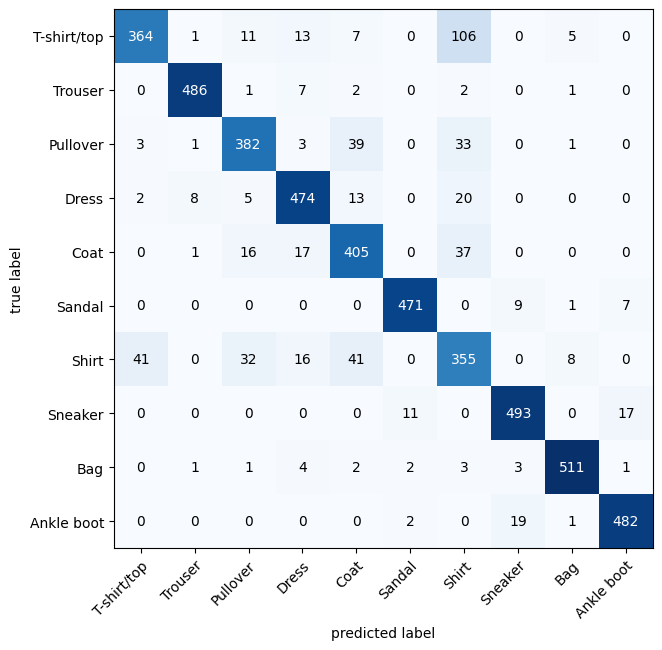

In [92]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

In [96]:
# save models
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "model_cnn_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_cnn_1.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/model_cnn_1.pth


In [100]:
# practice reloading
# Create a new instance of Fashion_MNIST_cnn_model_1 
loaded_model_2 = Fashion_MNIST_cnn_model_1(input_channels=1, 
    kernels=10, 
    output_shape=len(class_names)).to(device)

# load the weights for this instance from file
# Note: loading model will error if the shapes here aren't the same as the saved version
# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

In [101]:
# confirm that we get the same results as before loading! Why wouldn't we?
# calculate test set accuracy and compare to validation 
    ### test set confirmation of best model
MODEL_NAME = loaded_model_2
# Setup variables for accumulatively adding up loss and accuracy 
test_loss, test_acc = 0, 0 
MODEL_NAME.eval()
with torch.inference_mode():
# doing in batches allows less memory usage but may not be the fastest
    for X, y in validation_batches_dl: 
        # 1. Forward pass
        test_pred = MODEL_NAME(X)
        
        # 2. Calculate loss (accumatively)
        test_loss += calculate_loss(test_pred, y) # accumulatively add up the loss per epoch

        # 3. Calculate accuracy (preds need to be same as y_true)
        test_acc += calculate_accuracy(y, test_pred.argmax(dim=1))
    
    # Calculations on test metrics need to happen inside torch.inference_mode()
    # Divide total test loss by length of test dataloader (per batch)
    test_loss /= len(validation_batches_dl)

    # Divide total accuracy by length of test dataloader (per batch)
    test_acc /= len(validation_batches_dl)

## Print out what's happening
print(f"\n \
  Test set loss: {test_loss:.5f}, Test set acc: {test_acc:.2f}%\n")


   Test set loss: 0.31657, Test set acc: 88.48%

